<a href="https://colab.research.google.com/github/sankar2207/AIML-Projects-Reference/blob/master/AIML_Project_Submission_NueralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PART 1

## Assignment Description

**DOMAIN:**
Electronics and Telecommunication

---
**• CONTEXT:**
A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a
machine learning model which can help the company to predict the equipment’s signal quality using various parameters.


---


**• DATA DESCRIPTION:** The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality


---

**• PROJECT OBJECTIVE:** The need is to build a regressor which can use these parameters to determine the signal strength or quality [as number].
Steps and tasks:
1. Import data.
2. Data analysis & visualisation
• Perform relevant and detailed statistical analysis on the data.
• Perform relevant and detailed uni, bi and multi variate analysis.
Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if
required. Be highly experimental and analytical here to find relevant hidden patterns.
3. Design, train, tune and test a neural network regressor.
Hint: Use best approach to refine and tune the data or the model. Be highly experimental here.
4. Pickle the model for future use.

##Import Data

In [66]:
#Libraries for Google colab
from google.colab import data_table
data_table.enable_dataframe_formatter()
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [189]:
#Libraries for import data and data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
#Libraries for 3d visualization
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
#Libraries for model creation and execution
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
#Libraries for model creation and execution (nueral network)
import tensorflow as tf
import keras as k
from tensorflow.keras.optimizers import Adam
from keras import optimizers
from keras.models import Sequential
from keras.layers import Flatten, Activation, Dense, BatchNormalization, Dropout, InputLayer
from keras.utils.np_utils import to_categorical
from keras.engine.base_layer import Layer
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
#from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
import warnings
#Libraries to pickle final model
import pickle

In [68]:
#Import data from Google Drive
df_signal = pd.read_csv('/content/drive/MyDrive/Learning/AIML/Project Files/Nueral Network/Part- 1 - Signal.csv')
print('Shape of given dataset is:', df_signal.shape)
df_signal

Shape of given dataset is: (1599, 12)


Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0             7.4        0.700         0.00          1.9        0.076   
1             7.8        0.880         0.00          2.6        0.098   
2             7.8        0.760         0.04          2.3        0.092   
3            11.2        0.280         0.56          1.9        0.075   
4             7.4        0.700         0.00          1.9        0.076   
...           ...          ...          ...          ...          ...   
1594          6.2        0.600         0.08          2.0        0.090   
1595          5.9        0.550         0.10          2.2        0.062   
1596          6.3        0.510         0.13          2.3        0.076   
1597          5.9        0.645         0.12          2.0        0.075   
1598          6.0        0.310         0.47          3.6        0.067   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0            11.0         34.0      0.99780         3.51          0.56   
1            25.0         67.0      0.99680         3.20          0.68   
2            15.0         54.0      0.99700         3.26          0.65   
3            17.0         60.0      0.99800         3.16          0.58   
4            11.0         34.0      0.99780         3.51          0.56   
...           ...          ...          ...          ...           ...   
1594         32.0         44.0      0.99490         3.45          0.58   
1595         39.0         51.0      0.99512         3.52          0.76   
1596         29.0         40.0      0.99574         3.42          0.75   
1597         32.0         44.0      0.99547         3.57          0.71   
1598         18.0         42.0      0.99549         3.39          0.66   

      Parameter 11  Signal_Strength  
0              9.4                5  
1              9.8                5  
2              9.8                5  
3              9.8                6  
4              9.4                5  
...            ...              ...  
1594          10.5                5  
1595          11.2                6  
1596          11.0                6  
1597          10.2                5  
1598          11.0                6  

[1599 rows x 12 columns]

## Data Analysis & Visualization

### Basic Analysis, missing and duplicate values check

In [69]:
df_signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [70]:
df_signal.describe()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
count  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000   
mean      8.319637     0.527821     0.270976     2.538806     0.087467   
std       1.741096     0.179060     0.194801     1.409928     0.047065   
min       4.600000     0.120000     0.000000     0.900000     0.012000   
25%       7.100000     0.390000     0.090000     1.900000     0.070000   
50%       7.900000     0.520000     0.260000     2.200000     0.079000   
75%       9.200000     0.640000     0.420000     2.600000     0.090000   
max      15.900000     1.580000     1.000000    15.500000     0.611000   

       Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
count  1599.000000  1599.000000  1599.000000  1599.000000   1599.000000   
mean     15.874922    46.467792     0.996747     3.311113      0.658149   
std      10.460157    32.895324     0.001887     0.154386      0.169507   
min       1.000000     6.000000     0.990070     2.740000      0.330000   
25%       7.000000    22.000000     0.995600     3.210000      0.550000   
50%      14.000000    38.000000     0.996750     3.310000      0.620000   
75%      21.000000    62.000000     0.997835     3.400000      0.730000   
max      72.000000   289.000000     1.003690     4.010000      2.000000   

       Parameter 11  Signal_Strength  
count   1599.000000      1599.000000  
mean      10.422983         5.636023  
std        1.065668         0.807569  
min        8.400000         3.000000  
25%        9.500000         5.000000  
50%       10.200000         6.000000  
75%       11.100000         6.000000  
max       14.900000         8.000000

In [71]:
#Checking missing values and percentage for each feature
missing_count = df_signal.isna().sum()
missing_percentage = (missing_count*100/df_signal.shape[0]).round(1)
print("Missing count and percentages for each column are:\n",missing_count.astype('str')+'('+missing_percentage.astype('str')+'%)')

Missing count and percentages for each column are:
 Parameter 1        0(0.0%)
Parameter 2        0(0.0%)
Parameter 3        0(0.0%)
Parameter 4        0(0.0%)
Parameter 5        0(0.0%)
Parameter 6        0(0.0%)
Parameter 7        0(0.0%)
Parameter 8        0(0.0%)
Parameter 9        0(0.0%)
Parameter 10       0(0.0%)
Parameter 11       0(0.0%)
Signal_Strength    0(0.0%)
dtype: object


In [72]:
#Checking for exact row duplicates in dataset
print('Number of duplicated values in the given dataset is :', df_signal.duplicated().sum())

Number of duplicated values in the given dataset is : 240


#### Observation and Decision


1.   All values in the dataset are numerical
2.   No null values in the dataset - **No imputation required.**
3.   240 exact row duplicates are available - **Duplicates to be removed.**
4.   Numerical values has different magnitudes - **Scaling is required.**

### Removing duplicates

In [73]:
#Drop duplicates
df_signal.drop_duplicates(inplace=True)
print('Shape of given dataset (after removing duplication) is:', df_signal.shape)

Shape of given dataset (after removing duplication) is: (1359, 12)


### Visualization of target variable

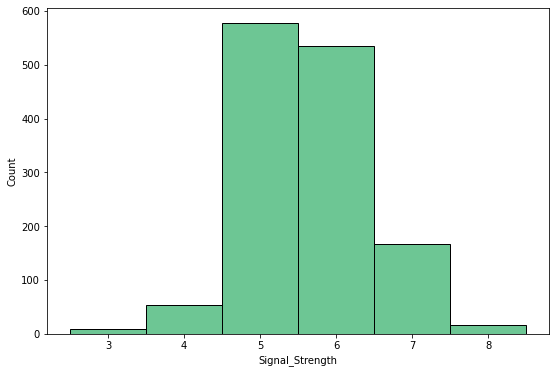

In [74]:
plt.figure(figsize=(9,6))
sns.histplot(df_signal['Signal_Strength'], discrete=True, color='mediumseagreen')

#### Observation

Target variable has multiple classes and it is imbalanced.

1.   Target is having a normal distribution
2.   Around 80% of the target variable is of value 5 and 6
3.   Around 10% of the target variable is of value 7
4.   Values 3,4 and 8 are having less than 5% of the total records



### Visualization of features and it's relationships

#### Pairplot between all 11 parameters and heatmap on their correlation

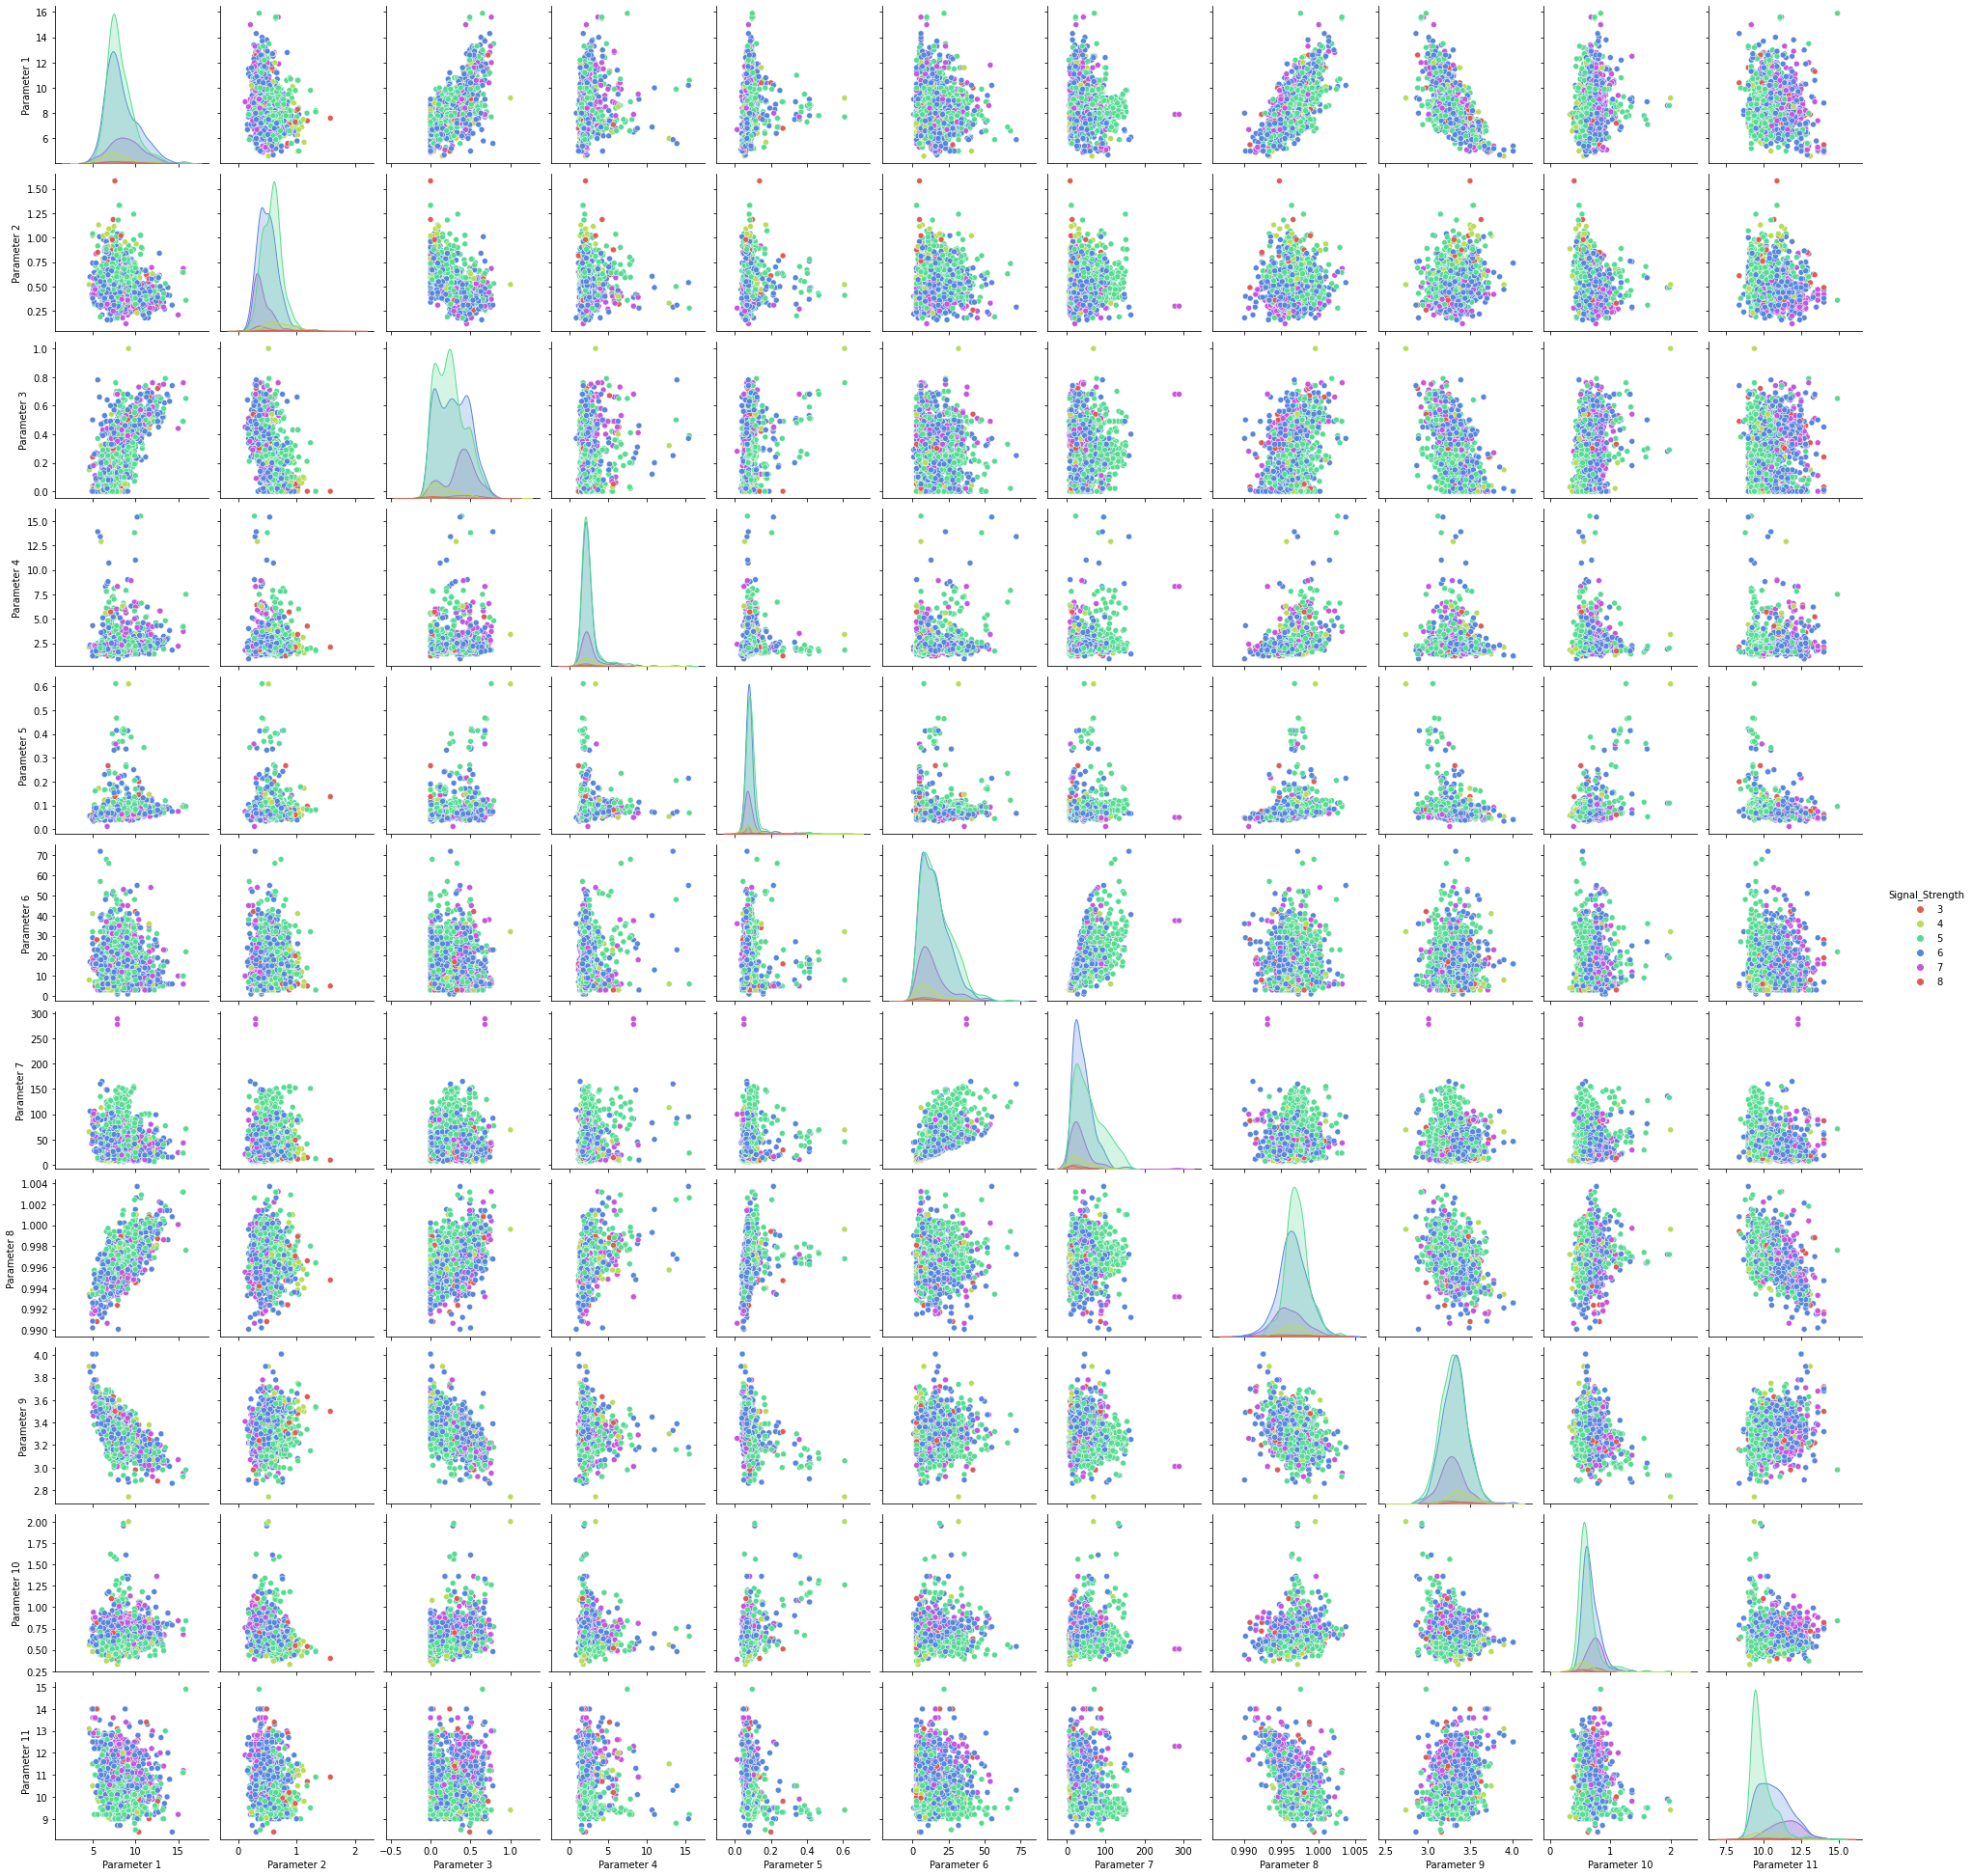

In [75]:
sns.pairplot(df_signal, hue='Signal_Strength', palette="hls")

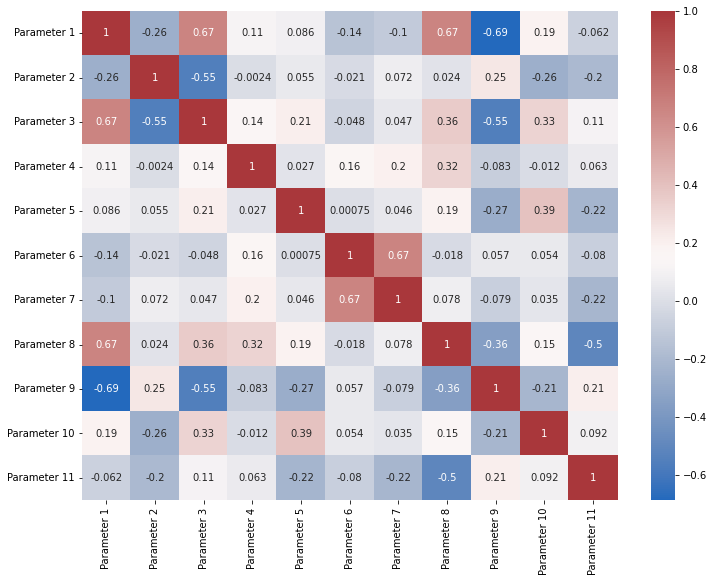

In [76]:
df_features = df_signal.iloc[:,:-1]
plt.figure(figsize=(12,9))
sns.heatmap(df_features.corr(), annot=True, cmap="vlag")

#### Observation


1.   High negative correlation observed between Parameter 1 and 9 - **Joint plot visualization needed**
2.   High postive correlation observed between Parameter 6 and 7 - **Joint plot visualization needed**
3.   Parameter is having high correlation with Parameter 3 and 8 - **Pair plot visualization needed**



### Joint plot visualization between Parameter 1 and 9 (2D and 3D)

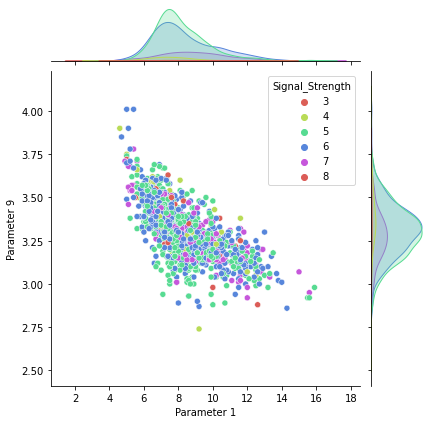

In [77]:
sns.jointplot(data=df_signal, x='Parameter 1', y='Parameter 9', hue='Signal_Strength', palette='hls')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


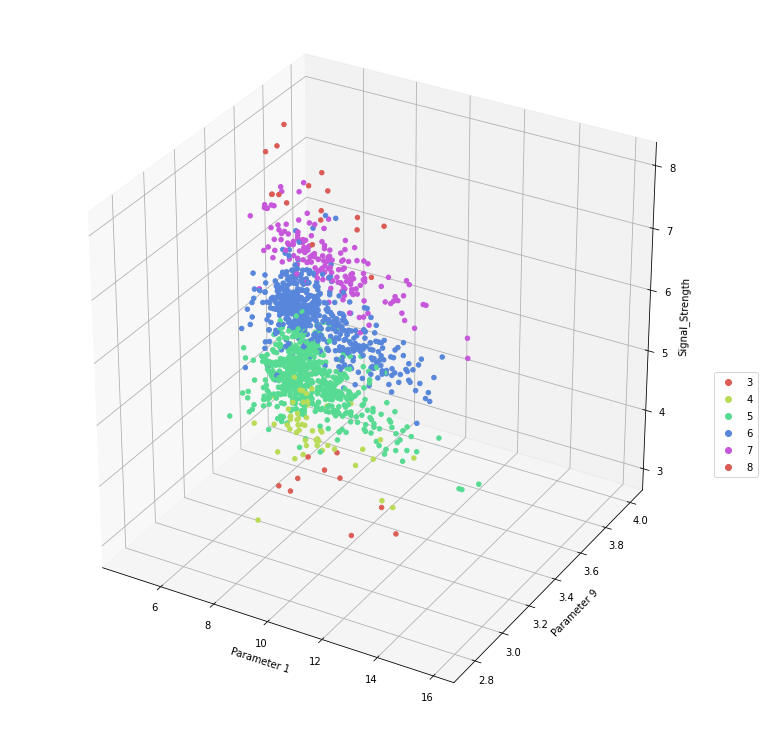

In [78]:
# initialize axis
x = df_signal['Parameter 1']
y = df_signal['Parameter 9']
z = df_signal['Signal_Strength']
# axes instance
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
fig.add_axes(ax)
# get colormap from seaborn
cmap_sns = ListedColormap(sns.color_palette("hls", 256).as_hex())
# plot
sc = ax.scatter(x, y, z, c=z, marker='o', cmap=cmap_sns, alpha=1)
ax.set_xlabel('Parameter 1')
ax.set_ylabel('Parameter 9')
ax.set_zlabel('Signal_Strength')
# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 0.5), loc=0)

####Observation: 
Although, correlation value is 0.69, the relation is not clear for all the values of Signal_Strengths. For Signal_Strength value of 3,4 and 8, the relationship between two parameters is unclear.

#### ***Decision***: No need to drop any of the parameters

#### Joint plot visualization between Parameter 6 and 7 (2D and 3D)

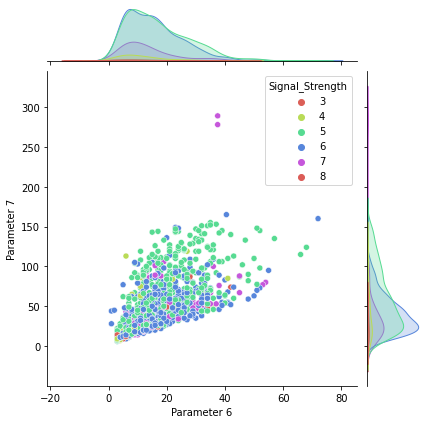

In [79]:
sns.jointplot(data=df_signal, x='Parameter 6', y='Parameter 7', hue='Signal_Strength', palette='hls')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


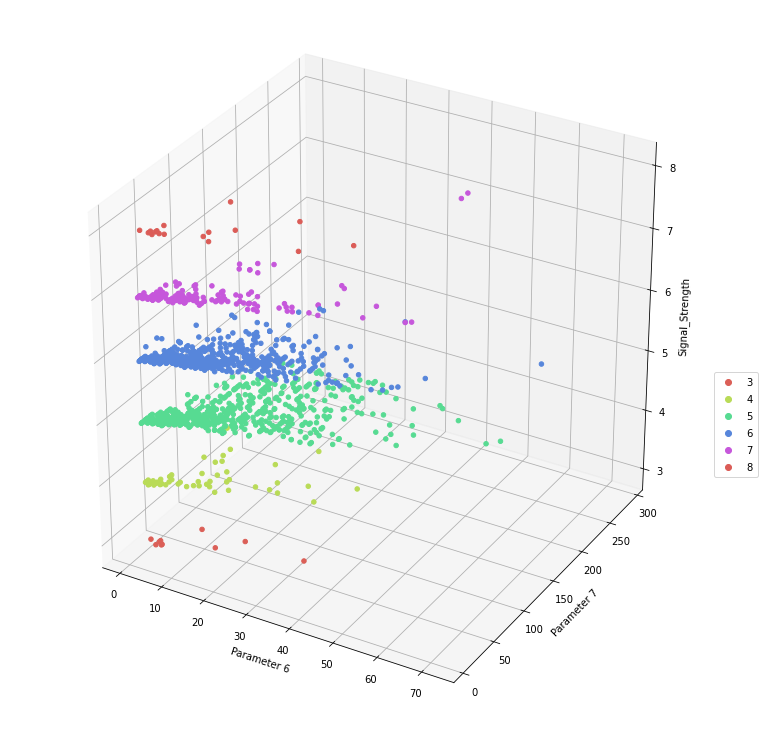

In [80]:
# initialize axis
x = df_signal['Parameter 6']
y = df_signal['Parameter 7']
z = df_signal['Signal_Strength']
# axes instance
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
fig.add_axes(ax)
# get colormap from seaborn
cmap_sns = ListedColormap(sns.color_palette("hls", 256).as_hex())
# plot
sc = ax.scatter(x, y, z, c=z, marker='o', cmap=cmap_sns, alpha=1)
ax.set_xlabel('Parameter 6')
ax.set_ylabel('Parameter 7')
ax.set_zlabel('Signal_Strength')
# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 0.5), loc=0)

####Observation: 
Correlation value is 0.67, the relationship is clear for all the values of Signal_Strengths. Outliers can be observed for multiple values of Signal Strength.

#### ***Decision***: Let's review the necessity of dropping one feature after outlier treament.

#### Pair plot visualization between Parameter 1, 3 and 8

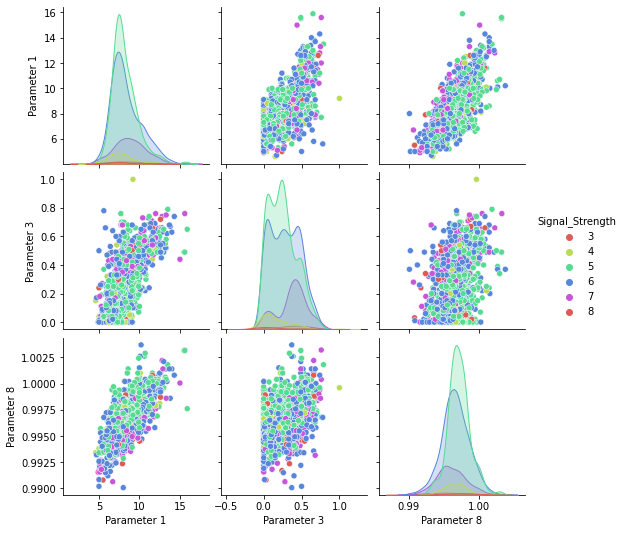

In [81]:
df_signal_positive_corr = df_signal[['Parameter 1','Parameter 3','Parameter 8','Signal_Strength']]
sns.pairplot(df_signal_positive_corr, hue='Signal_Strength',palette='hls')

#### ***Decision***: Let's review the necessity of dropping features after outlier treament.

### Outlier detection and treatment

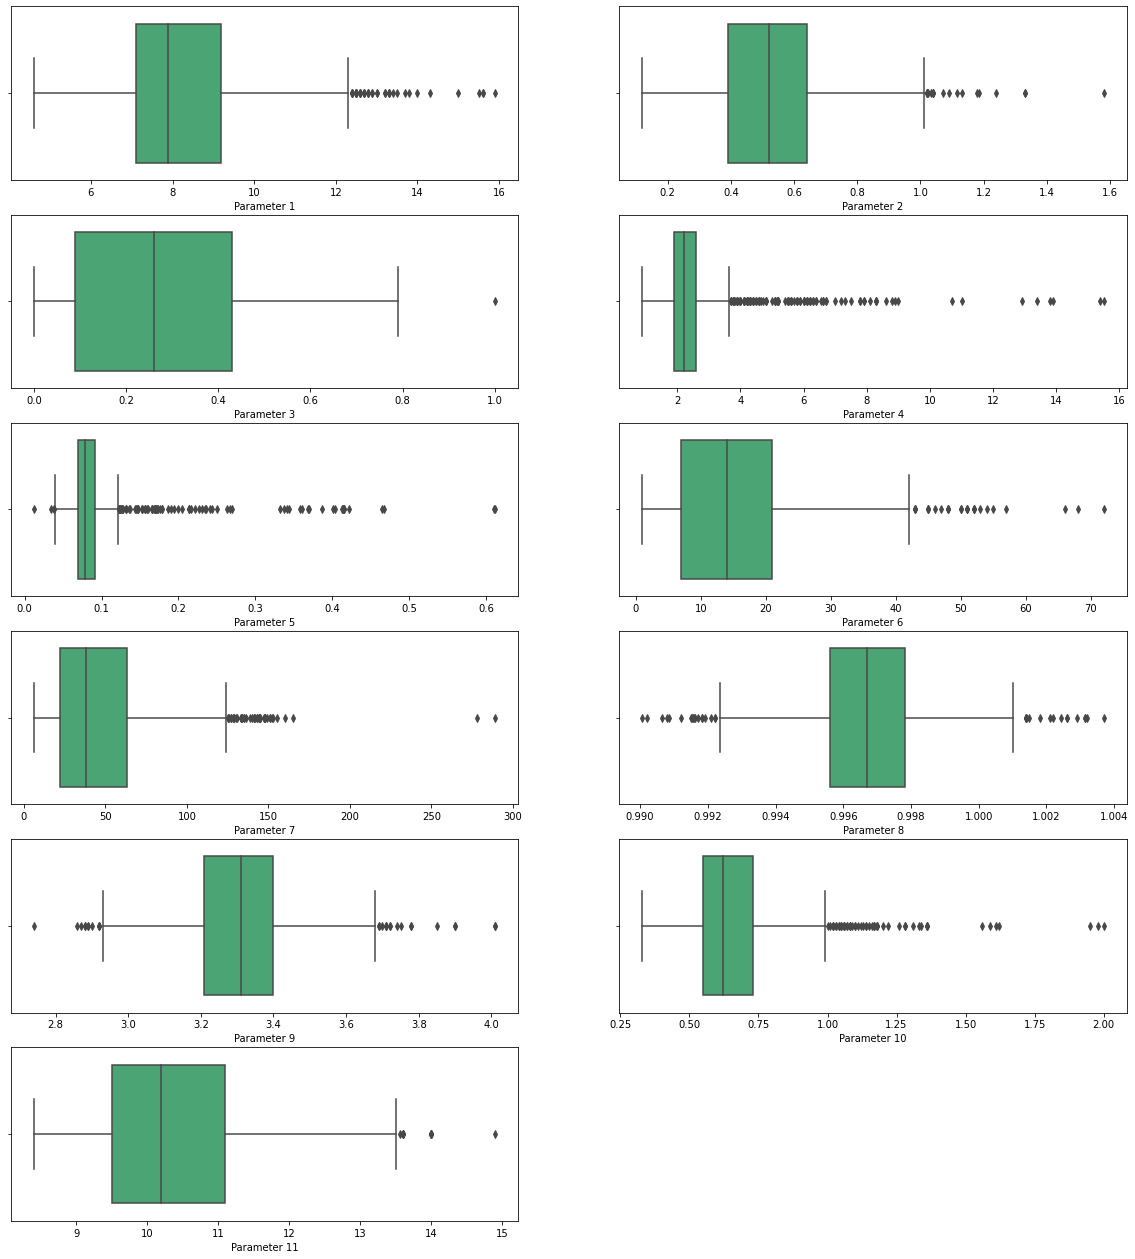

In [82]:
#Plotting boxplot to understand the outliers available in features
plt.figure(figsize=(20,30))
col=1
cols_without_target_variable = df_signal.columns[:-1]
for i in cols_without_target_variable:
  plt.subplot(8,2,col)
  sns.boxplot(x=df_signal[i], color='mediumseagreen')
  col += 1

#### Observation


*   Every Parameter has outlier and should be treated
*   Outlier can be capped with whsiker values
      1. Values lower than 'lower whisker value' = 'lower whisker value'  
      2. Values greater than 'upper wisher value' = 'upper whisker value'
*   Outlier treatment will be done in a copy of original dataframe for future comparisons




In [83]:
#Function to detect outlier and cap with whisker values
def find_outlier_and_capping_with_whisker_values(dataframe, columns_need_outlier_treatment):   
    for i in columns_need_outlier_treatment:
        Q1 = dataframe[i].quantile(0.25)
        Q3 = dataframe[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR        
        print('Checking for outlier values below lower limit(Q1 - 1.5*IQR) in column', i)
        if ((dataframe[i]<lower_limit).any() == True): #Check for outlier value below lower limit(Q1 - 1.5*IQR)
            print('Detected outlier values')
            print('Number of values to be replaced with lower whisker value is', (dataframe[i]<lower_limit).sum())
            #print('Below are the recrds to be replaced in column', i)
            #print(dataframe.loc[(dataframe[i]<lower_limit)])
            dataframe.loc[(dataframe[i]<lower_limit),i] = lower_limit
            print('Outlier value/s replaced')
        else:
            print('No outlier value below lower limit in column', i)
        print('Checking for outlier values above upper limit(Q3 + 1.5*IQR) in column', i)
        if ((dataframe[i]>upper_limit).any() == True): #Check for outlier value above upper limit(Q3 + 1.5*IQR)
            print('Detected outlier values')
            print('Number of values to be replaced with upper whisker value is', (dataframe[i]>upper_limit).sum())
            #print('Below are the recrds to be replaced in column', i)
            #print(dataframe.loc[(dataframe[i]>upper_limit)])            
            dataframe.loc[(dataframe[i]>upper_limit),i] = upper_limit
            print('Outlier value/s replaced')
        else:
            print('No outlier value above upper limit in column', i)

In [84]:
#Calling function to detect outliers and replace with relevant whisker values (upper or lower whisker)
df_signal_outlier_treated = df_signal.copy(deep=True)
find_outlier_and_capping_with_whisker_values(df_signal_outlier_treated, cols_without_target_variable)

Checking for outlier values below lower limit(Q1 - 1.5*IQR) in column Parameter 1
No outlier value below lower limit in column Parameter 1
Checking for outlier values above upper limit(Q3 + 1.5*IQR) in column Parameter 1
Detected outlier values
Number of values to be replaced with upper whisker value is 41
Outlier value/s replaced
Checking for outlier values below lower limit(Q1 - 1.5*IQR) in column Parameter 2
No outlier value below lower limit in column Parameter 2
Checking for outlier values above upper limit(Q3 + 1.5*IQR) in column Parameter 2
Detected outlier values
Number of values to be replaced with upper whisker value is 19
Outlier value/s replaced
Checking for outlier values below lower limit(Q1 - 1.5*IQR) in column Parameter 3
No outlier value below lower limit in column Parameter 3
Checking for outlier values above upper limit(Q3 + 1.5*IQR) in column Parameter 3
Detected outlier values
Number of values to be replaced with upper whisker value is 1
Outlier value/s replaced
Ch

#### Data visalization after outlier treatment (Dataframe Name: df_signal_outlier_treated)

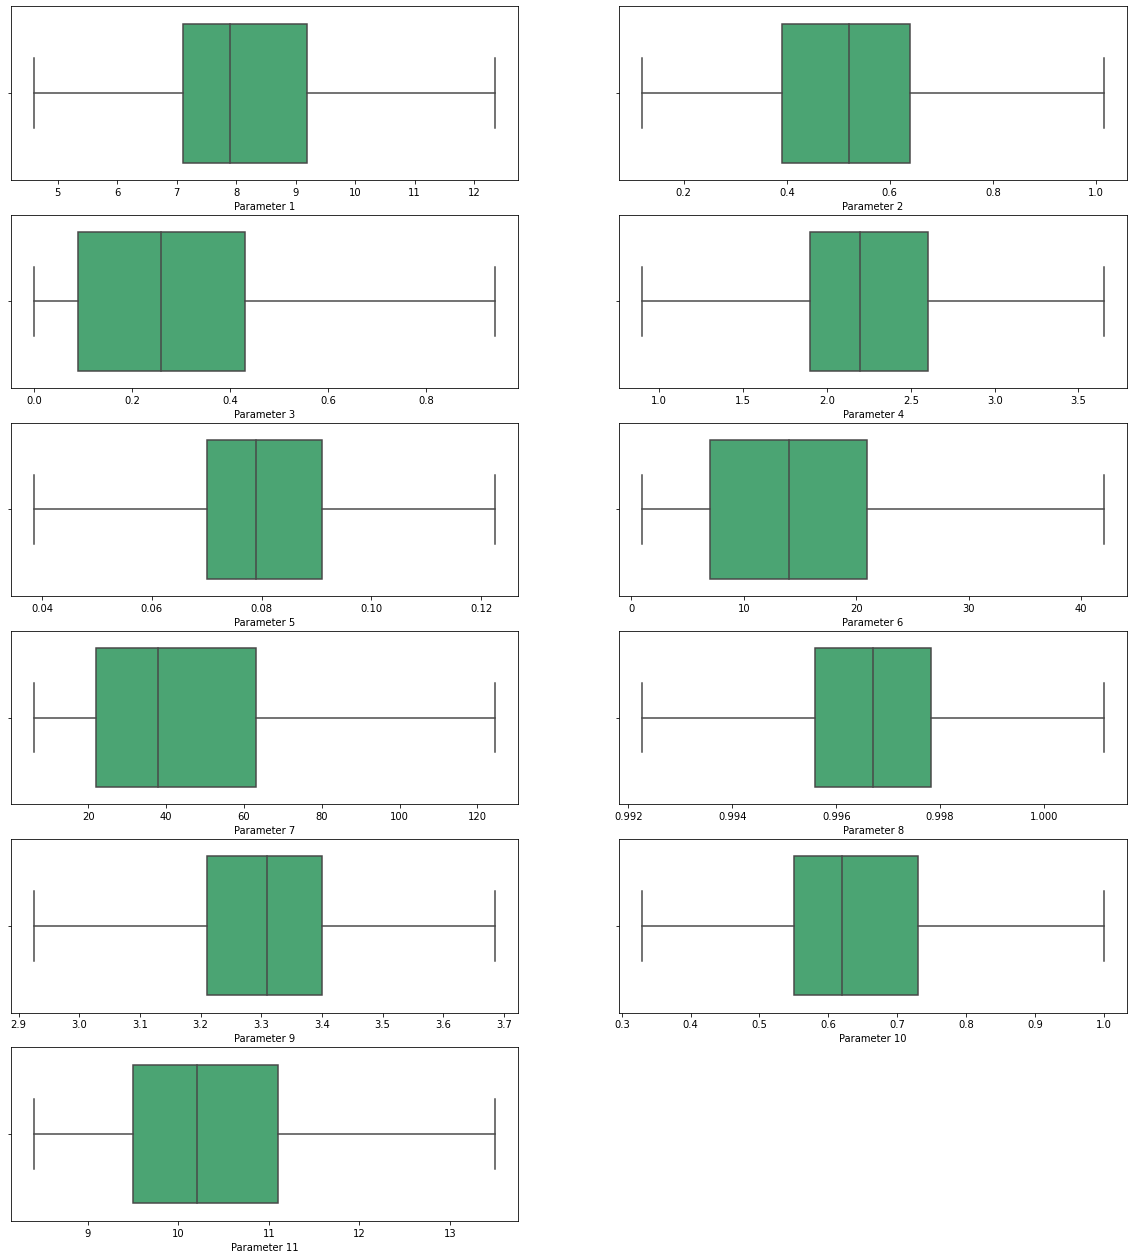

In [85]:
#Plotting boxplot to understand the outliers available in features
plt.figure(figsize=(20,30))
col=1
for i in cols_without_target_variable:
  plt.subplot(8,2,col)
  sns.boxplot(x=df_signal_outlier_treated[i], color='mediumseagreen')
  col += 1

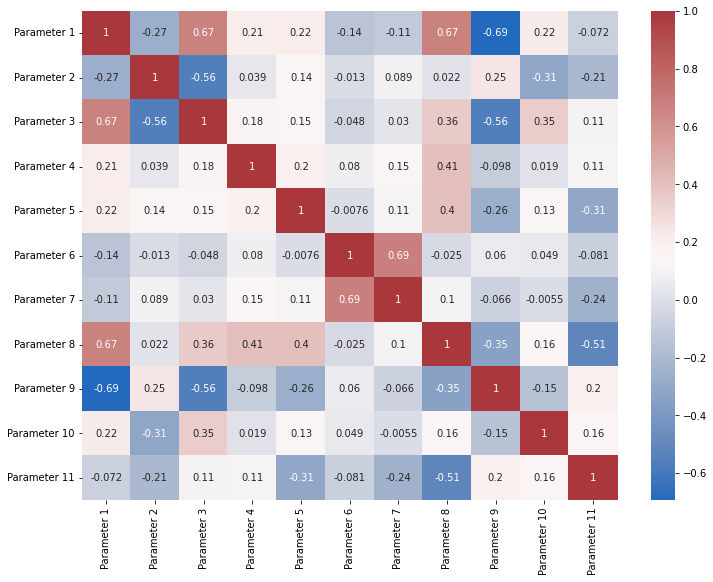

In [86]:
df_features_1 = df_signal_outlier_treated.iloc[:,:-1]
plt.figure(figsize=(12,9))
sns.heatmap(df_features_1.corr(), annot=True, cmap="vlag")

####Observation and Decision
1. Although few parameters has strong correlation it still have less than 0.7 (or) -0.7.
2. The value is not too strong to drop one of the feature as it will result in information loss.

##Design, train, tune and test a neural network regressor

###Train Test split of dataframe

In [87]:
#Split the dataframe into X and Y
X = df_signal_outlier_treated.drop('Signal_Strength', axis=1)
y = df_signal_outlier_treated['Signal_Strength']
ran_state = 7
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=ran_state)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5)
# #Split the original dataframe (outliers not removed) into X and Y
# X_raw = df_signal.drop('Signal_Strength', axis=1)
# y_raw = df_signal['Signal_Strength']
#X_raw_train,X_raw_test,y_raw_train,y_raw_test = train_test_split(X_raw,y_raw,train_size=0.7,random_state=ran_state)
#X_raw_test,X_raw_val,y_raw_test,y_raw_val = train_test_split(X_raw_test,y_raw_test,test_size=0.5)

In [129]:
#Printing shape of 4 valriables and validation
print("Shape of X train is :",X_train.shape)
print("Shape of y train is :",y_train.shape)
print("Shape of X train is :",X_test.shape)
print("Shape of y train is :",y_test.shape)

Shape of X train is : (951, 11)
Shape of y train is : (951,)
Shape of X train is : (204, 11)
Shape of y train is : (204,)


###Normalizing the train and test data

In [88]:
#Applying zscore for traing an test values
X_train_z = X_train.apply(zscore)
X_test_z = X_test.apply(zscore)
X_val_z = X_val.apply(zscore)
#Initializing Random number
np.random.seed(ran_state)
random.seed(ran_state)
tf.random.set_seed(ran_state)
#X_raw_train_z = X_raw_train.apply(zscore)
#X_raw_test_z = X_raw_test.apply(zscore)
#X_raw_val_z = X_raw_val.apply(zscore)

###Building Base model

In [148]:
base_model_regressor = Sequential()
base_model_regressor.add(Dense(units=X_train.shape[1],activation='relu'))
base_model_regressor.add(Dense(units=22,activation='relu'))
base_model_regressor.add(Dense(units=22,activation='relu'))
base_model_regressor.add(Dense(units=X_train.shape[1],activation='relu'))
base_model_regressor.add(Dense(units=1))

In [149]:
base_model_regressor.compile(loss='mse', optimizer='adam')

In [150]:
capture_base = base_model_regressor.fit(X_train_z,y_train, batch_size=32, epochs=50, validation_data=(X_val_z,y_val))

Epoch 1/50
30/30 [==============================] - 1s 7ms/step - loss: 28.3741 - val_loss: 23.2592
Epoch 2/50
30/30 [==============================] - 0s 4ms/step - loss: 17.6050 - val_loss: 10.6842
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 6.1591 - val_loss: 3.7365
Epoch 4/50
30/30 [==============================] - 0s 4ms/step - loss: 3.7941 - val_loss: 3.1420
Epoch 5/50
30/30 [==============================] - 0s 4ms/step - loss: 3.0210 - val_loss: 2.5201
Epoch 6/50
30/30 [==============================] - 0s 4ms/step - loss: 2.5369 - val_loss: 2.1161
Epoch 7/50
30/30 [==============================] - 0s 3ms/step - loss: 2.1565 - val_loss: 1.7998
Epoch 8/50
30/30 [==============================] - 0s 3ms/step - loss: 1.8620 - val_loss: 1.5071
Epoch 9/50
30/30 [==============================] - 0s 3ms/step - loss: 1.6297 - val_loss: 1.3321
Epoch 10/50
30/30 [==============================] - 0s 4ms/step - loss: 1.4472 - val_loss: 1.1744
Epoch 11/50
30/

In [151]:
base_model_regressor.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 11)                132       
                                                                 
 dense_43 (Dense)            (None, 22)                264       
                                                                 
 dense_44 (Dense)            (None, 22)                506       
                                                                 
 dense_45 (Dense)            (None, 11)                253       
                                                                 
 dense_46 (Dense)            (None, 1)                 12        
                                                                 
Total params: 1,167
Trainable params: 1,167
Non-trainable params: 0
_________________________________________________________________


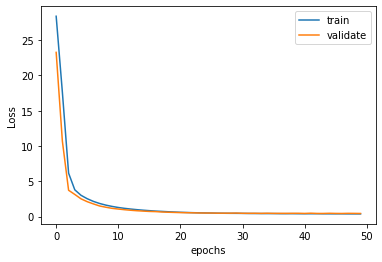

In [152]:
plt.plot(capture_base.history['loss'], label='train')
plt.plot(capture_base.history['val_loss'], label='validate')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [153]:
from sklearn.metrics import mean_squared_error
y_pred_base = base_model_regressor.predict(X_test_z)
mse_base_model = mean_squared_error(y_test, y_pred_base, squared=False)
print(mse_base_model)

0.6729888644548033


###Hyperparameter Tuning

In [154]:
def multi_model(learn_rate, layer_2_nuerons, layer_3_nuerons, #optimizer_name
                ):
  #Create Model
  model = Sequential()
  model.add(Dense(X_train.shape[1], activation='relu'))
  model.add(Dense(layer_2_nuerons, activation='relu'))
  model.add(Dense(layer_2_nuerons, activation='relu'))
  model.add(Dense(layer_3_nuerons, activation='relu'))
  model.add(Dense(1))
  #Compile Model
  model_optimizer = Adam(learning_rate = learn_rate)
  model.compile(loss='mse', optimizer=model_optimizer)
  return model

In [155]:
#Wrap model so it can be used by scikit-learn
nn_regressor = KerasRegressor(build_fn=multi_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [156]:
hyperparameters = dict(learn_rate = [0.001,0.01],
                       layer_2_nuerons = [(X_train.shape[1])*2,(X_train.shape[1])*3],
                       layer_3_nuerons = [X_train.shape[1],(X_train.shape[1])*2],
                       #optimizer_name = ['SGD', 'RMSprop', 'Adam']
                       )
hyperparameters

{'learn_rate': [0.001, 0.01],
 'layer_2_nuerons': [22, 33],
 'layer_3_nuerons': [11, 22]}

In [157]:
grid_regressor = GridSearchCV(estimator=nn_regressor, param_grid=hyperparameters, n_jobs=-1, cv=5)
grid_regressor_result = grid_regressor.fit(X_train_z,y_train)

30/30 [==============================] - 0s 3ms/step - loss: 9.3705


In [158]:
# Find best model's hyperparameters
means = grid_regressor.cv_results_['mean_test_score']
stds = grid_regressor.cv_results_['std_test_score']
params = grid_regressor.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("\nBest: %f using %s" % (grid_regressor.best_score_, grid_regressor.best_params_))

-27.487563 (4.559653) with: {'layer_2_nuerons': 22, 'layer_3_nuerons': 11, 'learn_rate': 0.001}
-2.747479 (0.288772) with: {'layer_2_nuerons': 22, 'layer_3_nuerons': 11, 'learn_rate': 0.01}
-20.698638 (2.423457) with: {'layer_2_nuerons': 22, 'layer_3_nuerons': 22, 'learn_rate': 0.001}
-2.640988 (0.356808) with: {'layer_2_nuerons': 22, 'layer_3_nuerons': 22, 'learn_rate': 0.01}
-21.357852 (6.196550) with: {'layer_2_nuerons': 33, 'layer_3_nuerons': 11, 'learn_rate': 0.001}
-2.695262 (0.736053) with: {'layer_2_nuerons': 33, 'layer_3_nuerons': 11, 'learn_rate': 0.01}
-22.530259 (1.654379) with: {'layer_2_nuerons': 33, 'layer_3_nuerons': 22, 'learn_rate': 0.001}
-2.838352 (1.015112) with: {'layer_2_nuerons': 33, 'layer_3_nuerons': 22, 'learn_rate': 0.01}

Best: -2.640988 using {'layer_2_nuerons': 22, 'layer_3_nuerons': 22, 'learn_rate': 0.01}


In [159]:
best_model_regressor = Sequential()
best_model_regressor.add(Dense(X_train.shape[1], activation='relu'))
best_model_regressor.add(Dense(grid_regressor_result.best_params_['layer_2_nuerons'], activation='relu'))
best_model_regressor.add(Dense(grid_regressor_result.best_params_['layer_2_nuerons'], activation='relu'))
best_model_regressor.add(Dense(grid_regressor_result.best_params_['layer_3_nuerons'], activation='relu'))
best_model_regressor.add(Dense(1))

optimizer_final = Adam(learning_rate=grid_regressor_result.best_params_['learn_rate'])
best_model_regressor.compile(loss='mse', optimizer=optimizer_final)
capture_final = best_model_regressor.fit(X_train_z,y_train, epochs=50, verbose=1, validation_data=(X_val_z, y_val))

Epoch 1/50
30/30 [==============================] - 1s 7ms/step - loss: 9.2717 - val_loss: 2.1483
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3706 - val_loss: 0.8694
Epoch 3/50
30/30 [==============================] - 0s 4ms/step - loss: 0.8242 - val_loss: 0.6501
Epoch 4/50
30/30 [==============================] - 0s 4ms/step - loss: 0.6574 - val_loss: 0.5725
Epoch 5/50
30/30 [==============================] - 0s 4ms/step - loss: 0.5394 - val_loss: 0.4901
Epoch 6/50
30/30 [==============================] - 0s 4ms/step - loss: 0.4991 - val_loss: 0.4908
Epoch 7/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4619 - val_loss: 0.4987
Epoch 8/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4650 - val_loss: 0.5368
Epoch 9/50
30/30 [==============================] - 0s 4ms/step - loss: 0.4498 - val_loss: 0.4657
Epoch 10/50
30/30 [==============================] - 0s 4ms/step - loss: 0.4418 - val_loss: 0.4856
Epoch 11/50
30/30 [

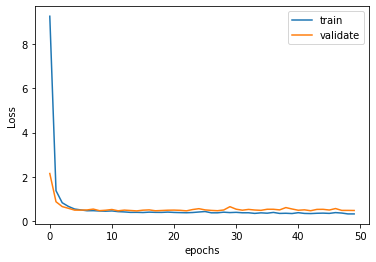

In [160]:
plt.plot(capture_final.history['loss'], label='train')
plt.plot(capture_final.history['val_loss'], label='validate')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [161]:
y_pred_final = best_model_regressor.predict(X_test_z)
mse_best_model = mean_squared_error(y_test, y_pred_final, squared=False)
print(mse_best_model)

0.7012126289979127


### Adding dropout feature

In [162]:
best_model_with_dropout = Sequential()
best_model_with_dropout.add(Dense(X_train.shape[1], activation='relu'))
best_model_with_dropout.add(Dense(grid_regressor_result.best_params_['layer_2_nuerons'], activation='relu'))
best_model_with_dropout.add(Dropout(0.2))
best_model_with_dropout.add(Dense(grid_regressor_result.best_params_['layer_2_nuerons'], activation='relu'))
best_model_with_dropout.add(Dropout(0.2))
best_model_with_dropout.add(Dense(grid_regressor_result.best_params_['layer_3_nuerons'], activation='relu'))
best_model_with_dropout.add(Dropout(0.2))
best_model_with_dropout.add(Dense(1))

optimizer_final = Adam(learning_rate=grid_regressor_result.best_params_['learn_rate'])
best_model_with_dropout.compile(loss='mse', optimizer=optimizer_final)
capture_with_dropout = best_model_with_dropout.fit(X_train_z,y_train, epochs=50, verbose=1, validation_data=(X_val_z, y_val))

Epoch 1/50
30/30 [==============================] - 1s 9ms/step - loss: 11.5120 - val_loss: 3.0756
Epoch 2/50
30/30 [==============================] - 0s 4ms/step - loss: 2.9710 - val_loss: 0.6371
Epoch 3/50
30/30 [==============================] - 0s 4ms/step - loss: 1.6422 - val_loss: 0.4768
Epoch 4/50
30/30 [==============================] - 0s 4ms/step - loss: 1.4872 - val_loss: 0.4302
Epoch 5/50
30/30 [==============================] - 0s 4ms/step - loss: 1.3009 - val_loss: 0.5962
Epoch 6/50
30/30 [==============================] - 0s 4ms/step - loss: 1.1472 - val_loss: 0.4409
Epoch 7/50
30/30 [==============================] - 0s 4ms/step - loss: 1.1074 - val_loss: 0.4618
Epoch 8/50
30/30 [==============================] - 0s 4ms/step - loss: 1.1157 - val_loss: 0.4425
Epoch 9/50
30/30 [==============================] - 0s 4ms/step - loss: 1.0985 - val_loss: 0.4454
Epoch 10/50
30/30 [==============================] - 0s 4ms/step - loss: 0.9944 - val_loss: 0.4635
Epoch 11/50
30/30 

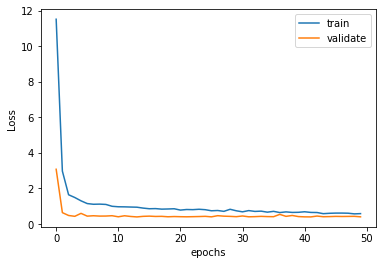

In [163]:
plt.plot(capture_with_dropout.history['loss'], label='train')
plt.plot(capture_with_dropout.history['val_loss'], label='validate')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [164]:
y_pred_with_dropout = best_model_with_dropout.predict(X_test_z)
mse_best_model_with_dropout = mean_squared_error(y_test, y_pred_with_dropout, squared=False)
print(mse_best_model_with_dropout)

0.6534595333910032


### Adding batch normalization

In [177]:
best_model_with_dropout_bn = Sequential()
best_model_with_dropout_bn.add(Dense(X_train.shape[1], activation='relu'))
best_model_with_dropout_bn.add(BatchNormalization())
best_model_with_dropout_bn.add(Dense(grid_regressor_result.best_params_['layer_2_nuerons'], activation='relu'))
best_model_with_dropout_bn.add(Dropout(0.2))
best_model_with_dropout_bn.add(BatchNormalization())
best_model_with_dropout_bn.add(Dense(grid_regressor_result.best_params_['layer_2_nuerons'], activation='relu'))
best_model_with_dropout_bn.add(Dropout(0.2))
best_model_with_dropout_bn.add(BatchNormalization())
best_model_with_dropout_bn.add(Dense(grid_regressor_result.best_params_['layer_3_nuerons'], activation='relu'))
best_model_with_dropout_bn.add(Dropout(0.2))
best_model_with_dropout_bn.add(BatchNormalization())
best_model_with_dropout_bn.add(Dense(1))

optimizer_final = Adam(learning_rate=grid_regressor_result.best_params_['learn_rate'])
best_model_with_dropout_bn.compile(loss='mse', optimizer=optimizer_final)
capture_with_dropout_bn = best_model_with_dropout_bn.fit(X_train_z,y_train, epochs=50, verbose=1, validation_data=(X_val_z, y_val))

Epoch 1/50
30/30 [==============================] - 2s 12ms/step - loss: 22.5784 - val_loss: 7.0236
Epoch 2/50
30/30 [==============================] - 0s 6ms/step - loss: 3.3129 - val_loss: 0.8386
Epoch 3/50
30/30 [==============================] - 0s 6ms/step - loss: 1.3283 - val_loss: 0.5426
Epoch 4/50
30/30 [==============================] - 0s 6ms/step - loss: 0.9789 - val_loss: 0.5077
Epoch 5/50
30/30 [==============================] - 0s 6ms/step - loss: 0.8032 - val_loss: 0.4546
Epoch 6/50
30/30 [==============================] - 0s 6ms/step - loss: 0.6798 - val_loss: 0.4349
Epoch 7/50
30/30 [==============================] - 0s 6ms/step - loss: 0.6177 - val_loss: 0.4469
Epoch 8/50
30/30 [==============================] - 0s 6ms/step - loss: 0.5734 - val_loss: 0.4221
Epoch 9/50
30/30 [==============================] - 0s 6ms/step - loss: 0.5299 - val_loss: 0.4190
Epoch 10/50
30/30 [==============================] - 0s 6ms/step - loss: 0.5240 - val_loss: 0.4243
Epoch 11/50
30/30

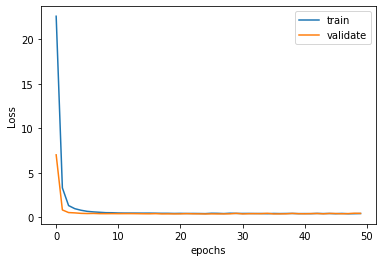

In [178]:
plt.plot(capture_with_dropout_bn.history['loss'], label='train')
plt.plot(capture_with_dropout_bn.history['val_loss'], label='validate')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [179]:
y_pred_with_dropout_bn = best_model_with_dropout_bn.predict(X_test_z)
mse_best_model_with_dropout_bn = mean_squared_error(y_test, y_pred_with_dropout_bn, squared=False)
print(mse_best_model_with_dropout_bn)

0.6663892112860835


## Comparison and conclusion

In [184]:
history_1 = ('Base Model with Adam optimizer', mse_base_model)
history_2 = ('Best Model from GridSearch CV', mse_best_model)
history_3 = ('Best Model from GridSearch CV with dropout feature', mse_best_model_with_dropout)
history_4 = ('Best Model from GridSearch CV with dropout and batchnormalization', mse_best_model_with_dropout_bn)
history_master = (history_1,history_2,history_3, history_4)

In [185]:
df_history = pd.DataFrame(history_master, columns=['Model', 'MSE score'])

In [186]:
df_history

Model  MSE score
0                     Base Model with Adam optimizer   0.672989
1                      Best Model from GridSearch CV   0.701213
2  Best Model from GridSearch CV with dropout fea...   0.653460
3  Best Model from GridSearch CV with dropout and...   0.666389

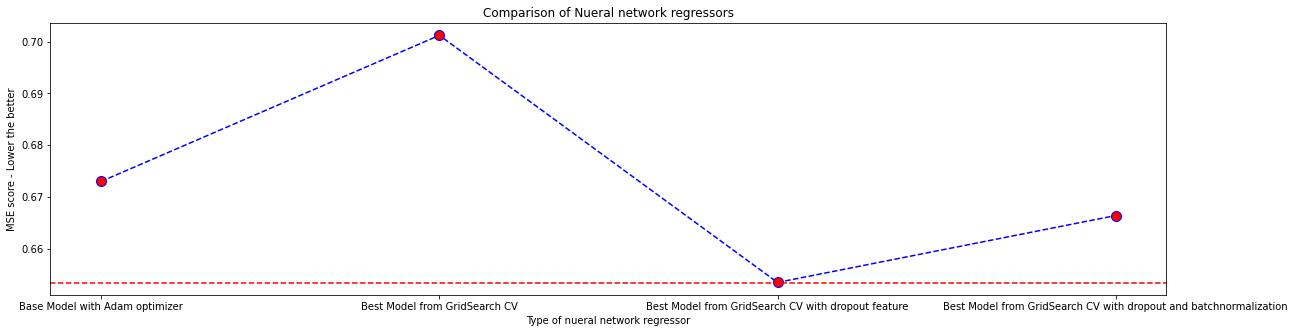

In [188]:
plt.figure(figsize=(20,5))
plt.plot(df_history['Model'],df_history['MSE score'],color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Comparison of Nueral network regressors')
plt.xlabel('Type of nueral network regressor')
plt.ylabel('MSE score - Lower the better')
plt.axhline(y = 0.6534, color = 'r', linestyle = '--')

###Conclusion:


1.   Regressor model with best features from Gridsearch CV **and dropout feature** is the best model with lowest MSE of 0.653
2.   Dropout feature has improved the model with greater extent.
3.   Adding batch normalization didn't helped the model to further improve for this data.



## Pickle the final model for future use

In [191]:
#Import and write a pickle file with best performing model
with open('best_regressor_model', 'wb') as files:
    pickle.dump(best_model_with_dropout, files)

In [193]:
#Reading the saved pickle file
with open('best_regressor_model' , 'rb') as f:
    read_model_from_pickle = pickle.load(f)

In [195]:
#Test data with pickle model and calculate score
pickle_pred = read_model_from_pickle.predict(X_test_z)
pickle_mse = mean_squared_error(y_test, pickle_pred, squared=False)
print('MSE score from pickle model for test data is:',pickle_mse)

MSE score from pickle model for test data is: 0.6534595333910032


In [194]:
read_model_from_pickle.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 11)                132       
                                                                 
 dense_58 (Dense)            (None, 22)                264       
                                                                 
 dropout_2 (Dropout)         (None, 22)                0         
                                                                 
 dense_59 (Dense)            (None, 22)                506       
                                                                 
 dropout_3 (Dropout)         (None, 22)                0         
                                                                 
 dense_60 (Dense)            (None, 22)                506       
                                                                 
 dropout_4 (Dropout)         (None, 22)              

#PART 2

##Assignment Description

**DOMAIN:** Autonomous Vehicles
**BUSINESS CONTEXT:** A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.
**DATA DESCRIPTION:** The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.
Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.The dataset has been provided in the form of h5py files.
**PROJECT OBJECTIVE:** We will build a digit classifier on the SVHN (Street View Housing Number) dataset.
Steps and tasks:
1. Import the data.
2. Data pre-processing and visualisation.
3. Design, train, tune and test a neural network image classifier.
Hint: Use best approach to refine and tune the data or the model. Be highly experimental here to get the best accuracy out of the model.
4. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

##Import Data

In [111]:
# Importh5py file from Google Drive
import h5py
h5f = h5py.File('/content/drive/MyDrive/Learning/AIML/Project Files/Nueral Network/Autonomous_Vehicles_SVHN_single_grey1.h5','r')
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [112]:
# Load the training, test and validation set
A_train = h5f['X_train'][:]
b_train = h5f['y_train'][:]
A_test = h5f['X_test'][:]
b_test = h5f['y_test'][:]

In [113]:
A_train

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]],

       [[ 86.9591,  87.0685,  88.3735, ...,  91.8014,  89.7477,
          92.5302],
        [ 86.688 ,  86.9114,  87.4337, ...,  90.7306,  87.204 ,
          88.5629],
        [ 85.9654,  85.8145,  85.9239, ...,  63.8626,  59.8199,
          54.8805],
        ...,
        [ 90.2236,  91.0448,  93.4637, ...,  55.3535,  48.5822,
          44.0557],
        [ 90.6427,  90.4039,  90.937 , ...,  78.2696,  77.4977,
          74.27  ],
        [ 88.0236,  88.1977,  86.6709, ...,  75.

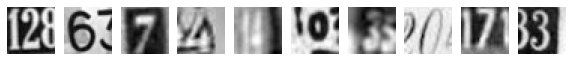

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [114]:

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(A_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (b_train[0:10]))

In [115]:
A_train.shape

(42000, 32, 32)

In [116]:
b_train.shape

(42000,)

In [117]:
b_train

array([2, 6, 7, ..., 7, 0, 4], dtype=uint8)

In [118]:
A_train = A_train.reshape(A_train.shape[0], 1024, 1)
A_test = A_test.reshape(A_test.shape[0], 1024, 1)

# # normalize inputs from 0-255 to 0-1
A_train = A_train / 255.0
A_test = A_test / 255.0

print('Resized Training set', A_train.shape, b_train.shape)
print('Resized Test set', A_test.shape, b_test.shape)

Resized Training set (42000, 1024, 1) (42000,)
Resized Test set (18000, 1024, 1) (18000,)


In [119]:
# one hot encode outputs
b_train = to_categorical(b_train)
b_test = to_categorical(b_test)

# no.of classes
num_classes = b_test.shape[1] 
print("The number of classes in this dataset are:",num_classes)

The number of classes in this dataset are: 10


In [120]:
def nn_model_classifier():
    # create model
    model = Sequential()  
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [121]:
model_classifier = nn_model_classifier()

In [122]:
# Compile model
opt = Adam(learning_rate=1e-3)

### Loss function = Categorical cross entropy
model_classifier.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) 

In [123]:
# Fitting the model
capture_classifier = model_classifier.fit(A_train, b_train, validation_data=(A_test, b_test), epochs=100, batch_size=300, verbose=2)

Epoch 1/100
140/140 - 2s - loss: 2.3028 - accuracy: 0.1041 - val_loss: 2.2782 - val_accuracy: 0.1331 - 2s/epoch - 16ms/step
Epoch 2/100
140/140 - 1s - loss: 2.1106 - accuracy: 0.2045 - val_loss: 1.9572 - val_accuracy: 0.2769 - 680ms/epoch - 5ms/step
Epoch 3/100
140/140 - 1s - loss: 1.7120 - accuracy: 0.3863 - val_loss: 1.5715 - val_accuracy: 0.4407 - 677ms/epoch - 5ms/step
Epoch 4/100
140/140 - 1s - loss: 1.4940 - accuracy: 0.4817 - val_loss: 1.3872 - val_accuracy: 0.5363 - 942ms/epoch - 7ms/step
Epoch 5/100
140/140 - 1s - loss: 1.3575 - accuracy: 0.5453 - val_loss: 1.3182 - val_accuracy: 0.5651 - 790ms/epoch - 6ms/step
Epoch 6/100
140/140 - 1s - loss: 1.2484 - accuracy: 0.5933 - val_loss: 1.2264 - val_accuracy: 0.6039 - 616ms/epoch - 4ms/step
Epoch 7/100
140/140 - 1s - loss: 1.1753 - accuracy: 0.6278 - val_loss: 1.1410 - val_accuracy: 0.6454 - 535ms/epoch - 4ms/step
Epoch 8/100
140/140 - 1s - loss: 1.1014 - accuracy: 0.6538 - val_loss: 1.0706 - val_accuracy: 0.6699 - 1s/epoch - 7ms/st

In [124]:
# Final evaluation of the model
scores = model_classifier.evaluate(A_test, b_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.6875383853912354
Accuracy: 0.8078333139419556


Text(0.5, 1.0, 'Training and validation loss')

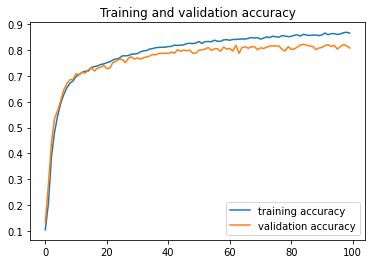

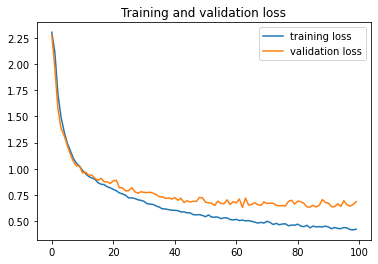

In [125]:
accuracy      = capture_classifier.history['accuracy']
val_accuracy  = capture_classifier.history['val_accuracy']
loss     = capture_classifier.history['loss']
val_loss = capture_classifier.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )